## Image Classification Model using the CIFAR-10 Dataset
- CIFAR-10 dataset contains 10 categories of images
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

#### Training the model for CIFAR-10 using a deeper CNN

In [6]:
#required imports
from __future__ import  print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import os

batch_size = 32
num_classes = 10
epochs =1

#Load CIFAR dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#display datashape and dimensions
print(f'X_train shape: {X_train.shape}')
print(f'{X_train.shape[0]} train Samples')
print(f'{X_test.shape[0]} test Samples')

#format the training data by normalising and changing the data type
X_train = X_train.astype('float32')

#format the training data by normalising and changing the data type
#no need to add a 3rd dimension because cifar10 is 3D
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


#One Hot Encode outputs
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
#padding = 'same' results in padding the input such that
#output has the same length as the original input

model.add(Conv2D(32, (3,3), padding='same',
                 input_shape =X_train.shape[1:]))
model.add(Activation('relu')) # note the activation is defined outside the conv layer
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#initialise RMSprop optimiser and configure some parameters
opt = keras.optimizers.RMSprop(lr=0.0001, weight_decay=1e-6)

#lets create the model
model.compile(loss = 'categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

X_train shape: (50000, 32, 32, 3)
50000 train Samples
10000 test Samples


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

#### Training the model

In [7]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True)
model.save('./TrainedModels/cifar_simple_cnn2.h5')

#evaluate model performance
scores = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {scores[0]}')
print(f'Test accuracy: {scores[1]}')

  1/313 [..............................] - ETA: 12s - loss: 1.0851 - accuracy: 0.5625

C:\Users\FSsemwanga\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 17ms/step - loss: 1.2306 - accuracy: 0.5619
Test Loss: 1.2305768728256226
Test accuracy: 0.5619000196456909


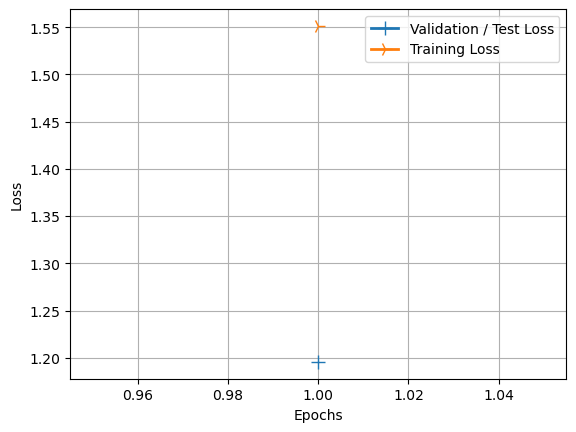

In [3]:
#Plotting Loss Charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Validation / Test Loss")
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker= '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

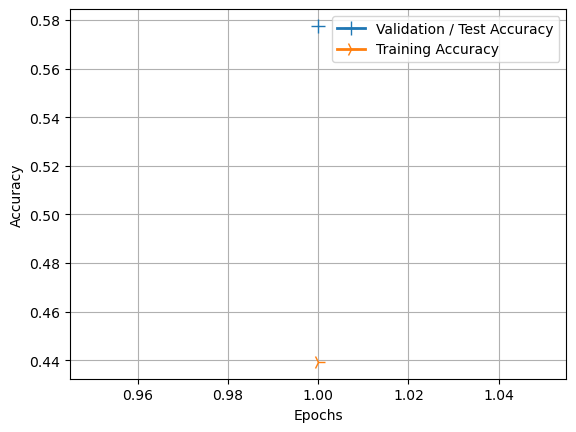

In [4]:
#plotting accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = "Validation / Test Accuracy")
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker= '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

#### Running some tests

In [12]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32, 32, 3
classifier = load_model('./TrainedModels/cifar_simple_cnn2.h5')
color = True
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
  BLACK = [0,0,0]
  res = int(res)
  if res == 0:
    pred = "airplane"
  if res == 1:
    pred = "bird"
  if res == 2:
    pred = "automobile"
  if res == 3:
    pred = "cat"
  if res == 4:
    pred = "deer"
  if res == 5:
    pred = "dog"
  if res == 6:
    pred = "frog"
  if res == 7:
    pred = "horse"
  if res == 8:
    pred = "ship"
  if res == 9:
    pred = "truck"
  expanded_image = cv2.copyMakeBorder(input_im, 0,0,0, imageL.shape[0]*2, cv2.BORDER_CONSTANT, value= BLACK)
  if color == False:
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2GBR)
  cv2.putText(expanded_image, str(pred), (300, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0, 255,0), 2)
  cv2.imshow(name, expanded_image)
  
for i in range(0,10):
  rand = np.random.randint(0, len(X_test))
  input_im = X_test[rand]
  imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
  input_im = input_im.reshape(1, img_row, img_height, img_depth)
  
  ##get prediction
  res = str(classifier.predict(input_im, 1, verbose=0).argmax())
  draw_test('Prediction', res, imageL, scale, img_row, img_height)
  cv2.waitKey(0)
  
  cv2.destroyAllWindows()